In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.stats import norm

In [2]:
stock = pd.DataFrame()

In [3]:
def stock_input(stocks):
    ticker = stocks
    stock[ticker] = yf.download(ticker,start='2000-01-01',end='2022-12-31')['Adj Close']
    stock['log_returns_'+stocks] = np.log(stock[ticker].pct_change() + 1)
    
    sns.lineplot(data=stock[ticker])
    plt.show()
    sns.lineplot(data= stock['log_returns_'+stocks])
    plt.show()
    sns.kdeplot(data=stock['log_returns_'+stocks])
    plt.show()
    
    return stock 

In [4]:
def stock_analysis(stocks):
    mean = stock['log_returns_'+stocks].mean() 
    var = stock['log_returns_'+stocks].var()
    std = stock['log_returns_'+stocks].std()
    print("log_return mean of {0}".format(stocks), mean)
    print("log_return variance of {0}".format(stocks), var)
    print("log_return std of {0}".format(stocks),std)

In [5]:
def simulation(ticker,num,sim):
    t_days = num
    simulations = sim
    #drift calculation
    mean = stock['log_returns_'+ticker].mean()
    var = stock['log_returns_'+ticker].var()
    std = stock['log_returns_'+ticker].std()
    
    drift = mean - 0.5*var
    
    daily_sim_log = std *norm.ppf(np.random.rand(t_days,simulations)) + drift
    daily_sim_simple = np.exp(daily_sim_log)
    
    #create array with the same shape as the returns
    price_array = np.zeros_like(daily_sim_simple)
    #array is now filled with 0s
    
    #insert final closing price of stock as first price of simulations
    price_array[0] = stock[ticker][-1]
    
    for t in range(1,t_days):
        price_array[t] = price_array[t-1] * daily_sim_simple[t]
        
        #plot 
        plt.plot(price_array)

In [6]:
def return_analysis(price_list):
    # Calculate worst, avg and best scenarios
    worst_sim = round(price_list[-1].min(),2)
    avg_sim = round(price_list[-1].mean(),2)
    best_sim = round(price_list[-1].max(),2)

    # Examine the worst, average, and best stock price sceanrios
    print("Best, Average and Worst Cases")
    print(f"Worst Simulation $/share: {worst_sim}")
    print(f"Avg Simulation $/share: {avg_sim}")
    print(f"Best Simulation $/share: {best_sim}")

    # Set up confidence intervals
    mean_finalday_prices = price_list_drift[-1].mean()
    std_finalday_prices = price_list_drift[-1].std()
    upper_int_1std = mean_finalday_prices + 1 * std_finalday_prices 
    lower_int_1std = mean_finalday_prices - 1 * std_finalday_prices
    upper_int_2std = mean_finalday_prices + 2 * std_finalday_prices
    lower_int_2std = mean_finalday_prices - 2 * std_finalday_prices

    # Print out the price range within the confidence intervals
    print("\n" + "Confidence Intervals")
    print(f"1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: ${lower_int_1std} and ${round(upper_int_1std,2)}")
    print(f"2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: ${round(lower_int_2std,2)} and ${round(upper_int_2std,2)}")

[*********************100%%**********************]  1 of 1 completed


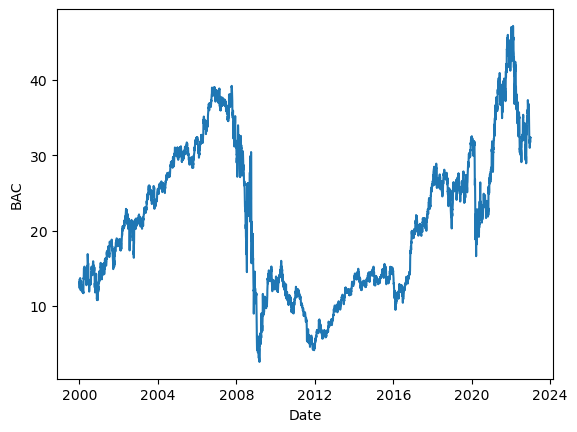

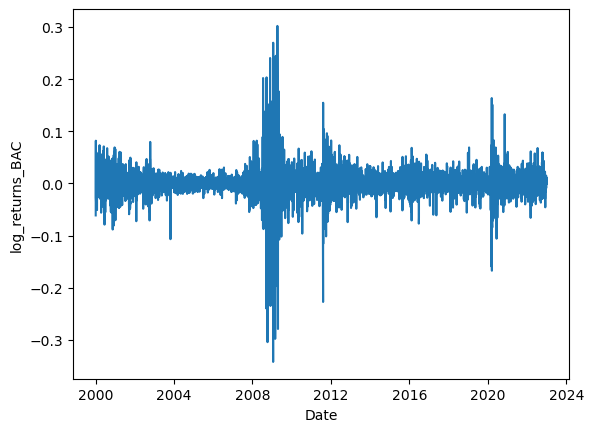

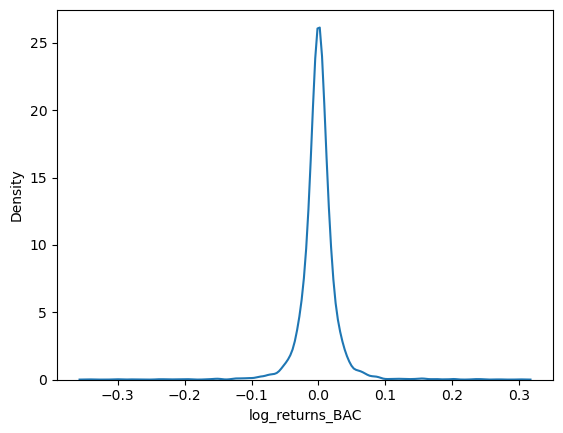

,BAC,log_returns_BAC
Date,,
2000-01-03,13.141624,NaN
2000-01-04,12.361604,-0.061189
2000-01-05,12.497257,0.010914
2000-01-06,13.565542,0.082024
2000-01-07,13.209450,-0.026600
...,...,...
2022-12-23,31.740864,0.002467
2022-12-27,31.799511,0.001846
2022-12-28,32.034126,0.007351


In [7]:
stock_input('BAC')

In [8]:
stock_analysis('BAC')

log_return mean of BAC 0.00015583149092863064
log_return variance of BAC 0.0008013039595300603
log_return std of BAC 0.02830731282778463


In [9]:
stock

,BAC,log_returns_BAC
Date,,
2000-01-03,13.141624,NaN
2000-01-04,12.361604,-0.061189
2000-01-05,12.497257,0.010914
2000-01-06,13.565542,0.082024
2000-01-07,13.209450,-0.026600
...,...,...
2022-12-23,31.740864,0.002467
2022-12-27,31.799511,0.001846
2022-12-28,32.034126,0.007351


In [10]:
t_days = 250
simulations = 10000

In [11]:
mean = stock['log_returns_BAC'].mean()
var = stock['log_returns_BAC'].var()
std = stock['log_returns_BAC'].std()

In [12]:
std

0.02830731282778463

In [13]:
sim_log = stock['log_returns_BAC'].std() * norm.ppf(np.random.rand(t_days,simulations))

In [14]:
sim_simple = np.exp(sim_log)

In [15]:
price_list = np.zeros_like(sim_simple)

In [16]:
price_list[0] = stock['BAC'][-1]

In [17]:
for t in range(1,t_days):
    price_list[t]= price_list[t-1] * sim_simple[t]
    
    plt.plot(price_list)

: 